### This notebook fits FCS correlation functions
Note that you need to have correlations.csv from the sim_fcs simulation (or from experimental data) loaded into your workspace.
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/fit_correlations.ipynb

In [1]:
#if you are using this from google colab, you need the utility modules
#(everything else should already be installed)
import os
if(not os.path.exists('pysimfcs_utils.py')):
    print('downloading pysimfcs libraries')
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/pysimfcs_utils.py
if(not os.path.exists('analysis_utils.py')):
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/analysis_utils.py
else:
    print('libraries already downloaded')

libraries already downloaded


In [2]:
#see sim_fcs for the descriptions of imports
import numpy as np
import matplotlib.pyplot as plt
import analysis_utils as simutils
import pandas as pd
import scipy.optimize as so #this does the curve fitting

In [3]:
#start by loading our correlations table
corrdf=pd.read_csv('correlations.csv',index_col=0)
#view the top of the table
corrdf.head()

,tau,ch1,ch2,ccorr
0,0.00000,0.937808,1.933236,0.576104
1,0.00005,0.551508,1.123270,0.533597
2,0.00010,0.519923,1.049390,0.501053
3,0.00015,0.487746,0.988982,0.470334
4,0.00020,0.460001,0.928930,0.441627


Text(0, 0.5, 'G(tau)')

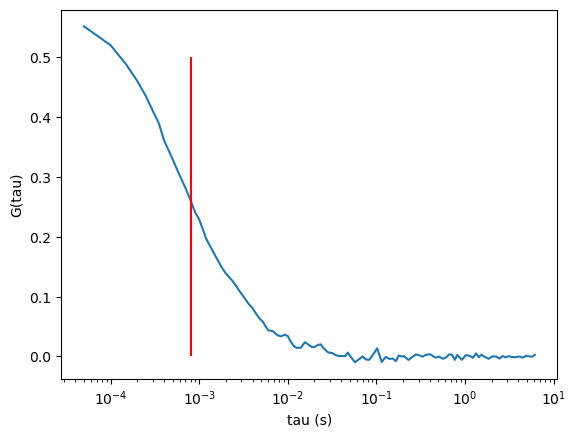

In [4]:
#plot the correlation curve and estimate it's tau value
plt.plot(corrdf.loc[1:,'tau'],corrdf.loc[1:,'ch1'])
plt.xscale('log')
plt.vlines([8e-4],0,0.5,color='red') #this is my tau guess
plt.xlabel('tau (s)')
plt.ylabel('G(tau)')

In [5]:
#lets guess the parameters for our fits
#parameters are baseline, zratio (typically 5), G(0), and tau
gparams=[0.0,5.0,0.6,0.0008]
#set lower and upper limits on those values for the fit
llims=[gparams[0]-gparams[2],4.9999,gparams[2]/3.0,gparams[3]/3.0]
ulims=[gparams[0]+gparams[2],5.0001,gparams[2]*3.0,gparams[3]*3.0]

In [6]:
#now we run the fit, first get the data to fit (1: will start at G(1), omitting the G(0)
fittauvals=corrdf.loc[1:,'tau']
fitdata=corrdf.loc[1:,'ch1']
#fcsfunc is our fitting function, p0 is our guess parameters
fparams,fcov=so.curve_fit(simutils.fcsfunc,fittauvals,fitdata,
             p0=gparams,bounds=(llims,ulims),method='trf')

#the standard error estimate method utilizes the square root of the diagonal of the covariance matrix
ferrs=np.sqrt(np.diag(fcov))
#now get the fit from the optimized parameters
fit=simutils.fcsfunc(fittauvals,*fparams)
#and get the chi squared value
rchi2=((corrdf.loc[1:,'tau']-fit)**2).sum()/(len(corrdf.loc[1:,'tau'])-len(gparams))

In [8]:
#print the fit parameters and error estimates
print('fit parameters:',fparams)
print('fit errors:',ferrs)
print('chi squared:',rchi2)

fit parameters: [-5.93142854e-04  5.00010000e+00  6.00426095e-01  6.51356726e-04]
fit errors: [5.97808963e-04 7.25272804e-01 3.86251878e-03 1.58769286e-05]
chi squared: 2.32218785714596


Text(0, 0.5, 'G(tau)')

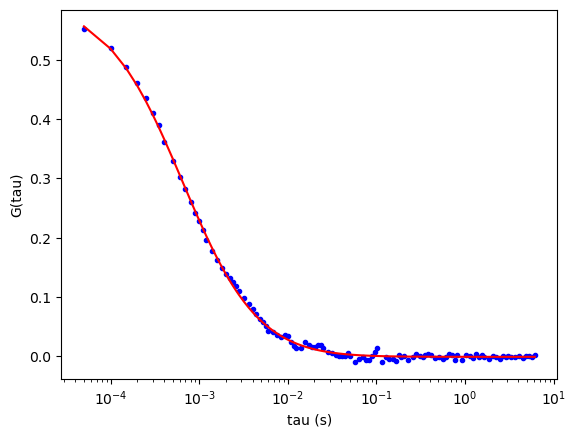

In [9]:
#now plot our fit
plt.plot(fittauvals,fitdata,'b.')
plt.plot(fittauvals,fit,'r-')
plt.xscale('log')
plt.xlabel('tau (s)')
plt.ylabel('G(tau)')

(-0.05, 0.6)

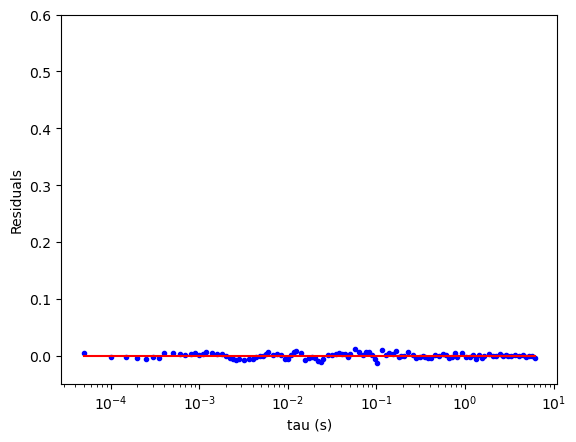

In [11]:
#plot the residuals
plt.plot(fittauvals,fit-fitdata,'b.')
plt.plot(fittauvals,[0.0]*len(fittauvals),'r-')
plt.xscale('log')
plt.xlabel('tau (s)')
plt.ylabel('Residuals')
plt.ylim(-0.05,0.6)